<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>


---

## Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc
import scipy.stats as sps

from PIL import Image

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
np.random.seed(12)
a = np.random.sample((10,10))
b = np.random.sample((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(np.ndim(a),np.ndim(b))
# ========
print(a.shape)
print(b.shape)

2 2
(10, 10)
(10, 10)


In [35]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[1,1],[2,2],[3,3]])
a.dot(b)

array([[14, 14],
       [32, 32],
       [50, 50]])

In [28]:
def mult(a, b):
    assert a.shape[1]==b.shape[0], 'matrix mismatch'
    res=np.zeros((a.shape[0],b.shape[1]), dtype=a.dtype)
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(a.shape[1]):
                res[i,j]+=a[i,k]*b[k,j]
    return res

In [24]:
def np_mult(a, b):
    return a.dot(b)

In [30]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 0 ns


array([[14, 14],
       [32, 32],
       [50, 50]])

In [26]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 0 ns


array([[2.90922901, 2.59103735, 1.4581222 , 2.55911203, 1.98154595,
        2.82977503, 2.18685086, 2.97930204, 1.82512568, 1.89638091],
       [2.89757252, 2.30418008, 2.17446167, 2.40884018, 1.99828455,
        3.21261097, 2.14843666, 3.28472886, 1.759554  , 2.46703368],
       [2.77846188, 2.05499631, 1.82423769, 2.45386602, 2.38388093,
        2.28086953, 2.54321245, 3.14438825, 1.67831496, 2.39247498],
       [4.03778117, 2.95322637, 2.68335944, 3.11019853, 3.0509067 ,
        3.10338716, 3.07806585, 4.16081253, 2.10261936, 3.16451673],
       [2.854692  , 2.16415443, 2.25169053, 1.9726828 , 1.92804204,
        2.31213346, 2.12340673, 2.76770174, 1.71215388, 1.95678994],
       [1.66796054, 1.47513908, 1.77436323, 1.14791363, 1.26488232,
        2.16812253, 1.45139149, 1.83883985, 1.29769804, 1.63747684],
       [3.56458913, 2.91901461, 2.5275859 , 2.73792024, 2.34911071,
        2.9663095 , 2.9337475 , 3.61530141, 2.41302275, 2.65392893],
       [2.85429682, 1.89922664, 2.4461298

### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [126]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return np.cumsum(A)/(np.arange(A.shape[0])+1)

In [129]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    S[0]=A[0]
    for i in range(1,len(A)):
        S[i]=A[i]+S[i-1]
    for i in range(1,len(A)):
        S[i]=S[i]/(i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 110 ms
Wall time: 5.23 s


0.0

In [130]:
stupid_sec_av([5,1,3,4])

[5, 3.0, 3.0, 3.25]

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [192]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Z=X.copy()
    Z[1::2]=a
    Z[::2]=Z[-2::-2]**3
    Y=np.hstack((X,Z))[::-1]
    return Y

In [179]:
z=X.copy()
z[1::2]=1
z

array([10,  1, 30,  1])

In [190]:
z[-2::-2]

array([30, 10])

In [191]:
X=np.array([10,20,30,40])
z=X.copy()
z[1::2]=1
z[::2]=z[-2::-2]**3
y=np.hstack((X,z))[::-1]
z,y

(array([27000,     1,  1000,     1]),
 array([    1,  1000,     1, 27000,    40,    30,    20,    10]))

In [197]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X,a=1):
    Z=[]
    n=len(X)
    for i in range(n):
        if i%2==1:
            Z.append(a)
        else:
            Z.append(X[n-i-2]**3)
    Y=list(X)+Z
    Y=Y[::-1]
    return Y

In [201]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 240 ms
Wall time: 4.01 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ: быстрее, за счет векторизации (выполнения на низком уровне операций, без питоновской обертки над каждым элементом)

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [217]:
a = np.random.rand(5,6,7)
b = np.random.rand(5,6,7)

In [218]:
def stupid_scalar_product(a,b):
    r=[]
    for i in range(len(a)):
        ri=[]
        for j in range(len(a[0])):
            rj=[]
            for k in range(len(a[0][0])):
                rj.append(a[i][j][k]*b[i][j][k])
            ri.append(rj)
        r.append(ri)
    return r

In [220]:
def numpy_scalar_product(a,b):
    return a*b

In [221]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

Wall time: 0 ns
Wall time: 0 ns


0.0

### Задание 5*

Нужно написать матричное произведение БЕЗ циклов и БЕЗ символа @, БЕЗ `np.dot` и вообще БЕЗ какой-либо вспомогательной функции из `numpy`, то есть пользуясь только индексированием, взятем суммы по нужным осям и поэлементным произведенем (да, это возможно). Рекомендуем гуглить по запросу "NumPy broadcasting"

In [116]:
def cool_matrix_product(A, B):
    return (A[np.newaxis,:,:]*B.T[:,np.newaxis,:]).sum(axis=2).T

In [119]:
np.allclose(np_mult(a,b),cool_matrix_product(a,b))

True

Ваш код не будет проверяться нами непосредственно, однако это очень и очень полезное упражнение.

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [222]:
pic = misc.face()  # встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [223]:
print(type(pic),pic.shape)

<class 'numpy.ndarray'> (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ: три канала RGB

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

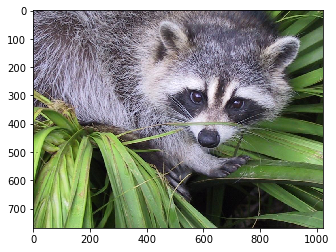

In [224]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [225]:
print(pic[0,:10])

[[121 112 131]
 [138 129 148]
 [153 144 165]
 [155 146 167]
 [155 146 167]
 [158 148 172]
 [159 149 173]
 [156 146 170]
 [147 138 159]
 [137 128 149]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [226]:
print(pic.max(),pic.min(),pic.mean())

255 0 110.16274388631184


### Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [3]:
pic = misc.face(gray=True)

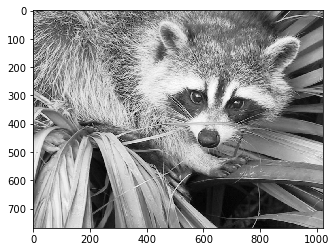

In [10]:
plt.imshow(pic,cmap=plt.cm.Greys_r)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [11]:
print(pic.shape)
h,w=pic.shape

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

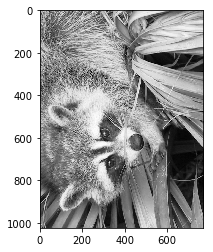

In [12]:
plt.imshow(pic.T,cmap=plt.cm.Greys_r)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [13]:
pic=pic+50

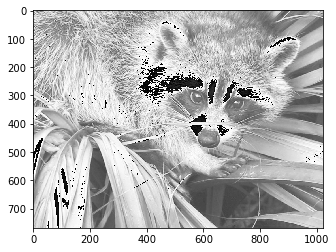

In [15]:
plt.imshow(pic,cmap=plt.cm.Greys_r)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [16]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i,j,:]=int(pic[i][j]/3)

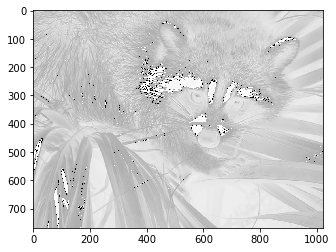

In [18]:
plt.imshow(new_pic)

### Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [19]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

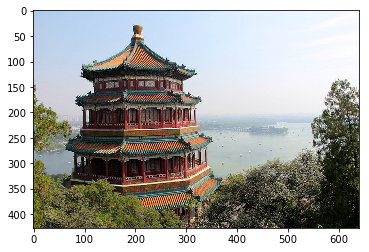

In [20]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [21]:
h, w, c = china.shape

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

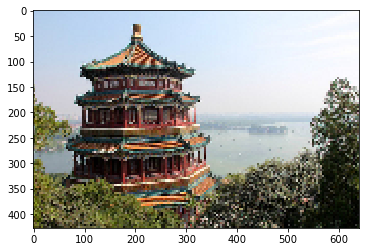

In [24]:
from copy import copy
compressed_pic = copy(china)
for i in range(h):
    ci=min(h-1,(i//4+1)*4-1)
    for j in range(w):
        cj=min(w-1,(j//4+1)*4-1)
        compressed_pic[i,j,:]=compressed_pic[ci,cj,:]
plt.imshow(compressed_pic)

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [25]:
def calculate_mismatch(a,b):
    mismatch=np.abs(a-b).sum()
    print(mismatch)

In [27]:
calculate_mismatch(china,compressed_pic)

82150946


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [32]:
china_sin=np.sin(china,dtype=np.float32)

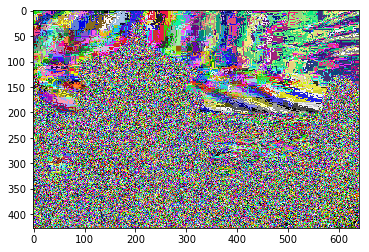

In [33]:
plt.imshow(china_sin) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [35]:
import librosa #импортируем библиотеку
import IPython.display

In [36]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [37]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [38]:
print(type(audio),audio.shape[0],audio.mean())

<class 'numpy.ndarray'> 739329 -7.933527e-06


    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

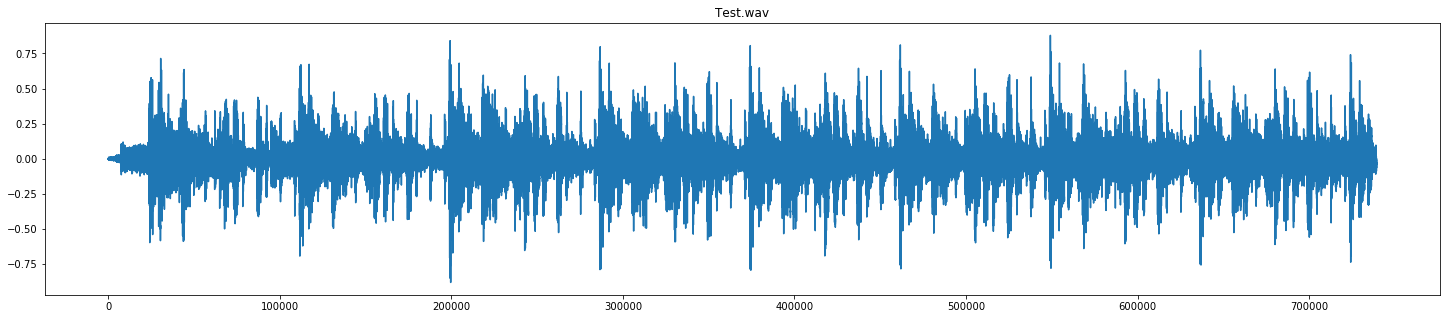

In [39]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

In [41]:
sr

22050

Обрежьте последние 4 секунды файла

In [42]:
audio = audio[:sr*4]

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [43]:
audio = audio*0.75

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [44]:
IPython.display.Audio(audio, rate=sr)